##### **Imports**

In [138]:

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
from scipy.stats import gaussian_kde
import pandas as pd
from scipy.optimize import minimize
from matplotlib.ticker import AutoMinorLocator
from astropy.coordinates import SkyCoord, Angle
import astropy.units as u
import seaborn as sns

colors = ['crimson','midnightblue', 'violet','orange','springgreen','dodgerblue','darkviolet', 'olive','tomato']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

##### **Exercise 1**

In [139]:
def generate(pseudos,Nbins,mubg,musig):
	Ntot = Nbins*mubg + musig
	Nsig = musig
	S = []
	B = []
	TS = []
	for i in range(0,Nbins) :
		B.append((Ntot-Nsig)/(1.*Nbins))
		if i==0 :
			S.append(Nsig)
		else :
			S.append(0.0)
	for run in range(0,pseudos) :
		bin = []
		totevents = 0
		for i in range(0,Nbins) :
			temp = np.random.poisson(lam=S[i]+B[i])
			bin.append(temp)
			totevents += temp
		temp = 0.0
		if bin[0] > 0.0 :
			temp += 2.*bin[0]*np.log((Nbins*1./(totevents*1.))*bin[0])
		if totevents-bin[0] > 0.0 :
			temp += 2.*(totevents-bin[0]*1.)*np.log((Nbins*1./(totevents*1.))*(totevents-bin[0])/(Nbins-1.0))
				
		TS.append(temp)
	return TS

In [140]:
TS_01 = generate(pseudos=10000,Nbins=100,mubg=1000,musig=0)
TS_02 = generate(pseudos=10000,Nbins=100,mubg=1000,musig=100)
TS_03 = generate(pseudos=10000,Nbins=100,mubg=1000,musig=200)

C:\Users\gusta\AppData\Local\Temp\ipykernel_15840\1389597777.py:6: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10**3)


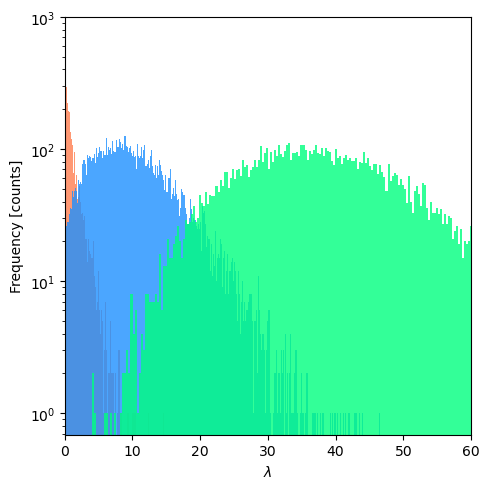

In [141]:
plt.figure(figsize = (5,5))
plt.hist(TS_01,bins=300,log=True,alpha=0.8,color="coral")
plt.hist(TS_02,bins=300,log=True,alpha=0.8,color="dodgerblue")
plt.hist(TS_03,bins=300,log=True,alpha=0.8,color="springgreen")
plt.xlim(0,60)
plt.ylim(0,10**3)
plt.xlabel('$\lambda$')
plt.ylabel('Frequency [counts]')
plt.tight_layout()
plt.show()

##### **Mini-Exercise**

In [142]:
x = np.random.uniform(0,2*np.pi)
y = np.random.uniform(0,np.pi)

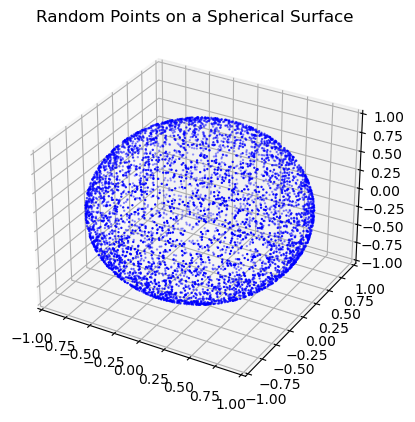

In [143]:
# Generate random data
num_points = 5000  # Number of points to generate
x = np.random.uniform(0, 2*np.pi, num_points)
z = np.random.uniform(-1, 1, num_points)
y = np.arccos(z)  # This will be uniformly distributed in space
x_cart = np.sqrt(1 - z**2) * np.cos(x)
y_cart = np.sqrt(1 - z**2) * np.sin(x)
z_cart = z

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot a sphere for reference
u, v = np.mgrid[0:2*np.pi:100j, 0:np.pi:50j]
x_sphere = np.sin(v) * np.cos(u)
y_sphere = np.sin(v) * np.sin(u)
z_sphere = np.cos(v)
# Plot the random points
ax.scatter(x_cart, y_cart, z_cart, color="b",s=0.5)

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
plt.title("Random Points on a Spherical Surface")
plt.show()


In [148]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import Angle
import astropy.units as u

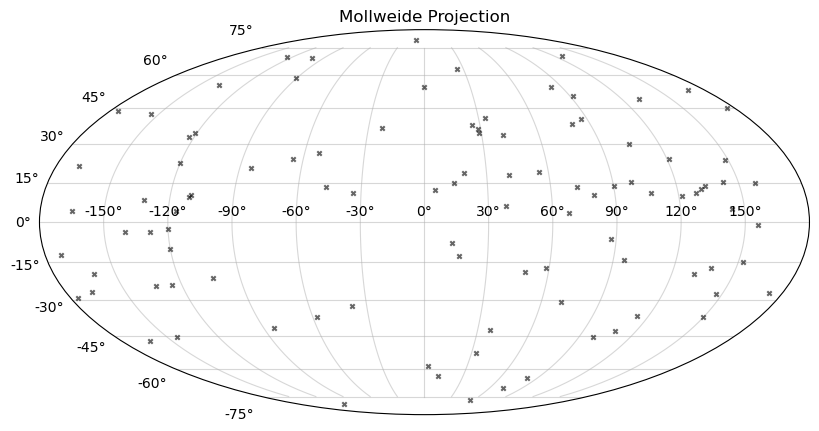

In [170]:
num_points = 100

x = np.random.uniform(0, 2*np.pi, num_points)  # Azimuthal angle
z = np.random.uniform(-1, 1, num_points)  # Cosine of the polar angle
y = np.arccos(z)  # Polar angle

ra = Angle(x * u.rad)  # Creating Angle object
dec = Angle((np.pi/2 - y) * u.rad)  # Convert from polar angle to declination

ra = ra.wrap_at(180 * u.deg)

ra_rad = ra.radian
dec_rad = dec.radian

plt.figure(figsize=(10, 5))
ax = plt.subplot(111, projection="mollweide")
ax.scatter(ra_rad, dec_rad, s=10,marker='x',color='k', alpha=0.60)

plt.grid(True,alpha=0.5,zorder=-10)
ax.set_axisbelow(True)
plt.title("Mollweide Projection")
plt.show()


In [166]:
import numpy as np

def two_point_correlation(x, y, z, phi):
    N = len(x)  # Total number of events
    corr = 0  # Initialize the correlation value
    
    cos_phi = np.cos(phi)
    
    for i in range(N):
        for j in range(i):  # Ensure j < i to avoid double counting and self-counting
            # Calculate the dot product to get cosine of the angle
            cos_phi_ij = x[i] * x[j] + y[i] * y[j] + z[i] * z[j]
            
            # Heaviside step function application (count if cos(phi_ij) - cos(phi) >= 0)
            if cos_phi_ij - cos_phi >= 0:
                corr += 1
                
    corr = 2 * corr / (N * (N - 1))
    
    return corr

cums = []

for phi in np.linspace(-1,1,1000):
    cummy = two_point_correlation(x,y,z,phi)
    cums.append(cummy)
